<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [4]:
from google.colab import drive
drive.mount('/content/drive')

sales = pd.read_csv('/content/drive/MyDrive/ESAA_YB/product_sales (1).csv')
print(sales.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [5]:
print(sales.shape) 
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [6]:
#모델 생성
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [7]:
#훈련 
kmeans.fit(sales)
#예측치 생성
pred= kmeans.predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [12]:
sales['cluster']=pred
sales

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1
3,5.2,0.2,3.0,1.4,1
4,4.7,0.2,3.2,1.6,1
...,...,...,...,...,...
145,5.4,0.2,3.4,1.7,1
146,5.1,0.4,2.0,1.5,1
147,4.6,0.2,3.6,1.0,1
148,5.1,0.5,3.3,1.7,1


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [22]:
salesDF=sales.drop(columns='cluster')
salesDF

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6
...,...,...,...,...
145,5.4,0.2,3.4,1.7
146,5.1,0.4,2.0,1.5
147,4.6,0.2,3.6,1.0
148,5.1,0.5,3.3,1.7


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [23]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x']=pca_transformed[:,0]
sales['pca_y']=pca_transformed[:,1]
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,pca_x,pca_y
0,5.0,0.2,3.0,1.6,1,-2.516330,-0.074159
1,5.0,0.4,3.4,1.6,1,-2.466679,0.231335
2,5.2,0.2,3.5,1.5,1,-2.557365,0.456400


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

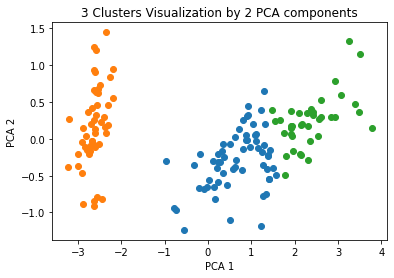

In [26]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=sales[sales['cluster']==0].index
marker1_ind=sales[sales['cluster']==1].index
marker2_ind=sales[sales['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출.o,s,^로 마커 표시
plt.scatter(x=sales.loc[marker0_ind,'pca_x'],y=sales.loc[marker0_ind,'pca_y'])
plt.scatter(x=sales.loc[marker1_ind,'pca_x'],y=sales.loc[marker1_ind,'pca_y'])
plt.scatter(x=sales.loc[marker2_ind,'pca_x'],y=sales.loc[marker2_ind,'pca_y'])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA components')
plt.show()
     

## 4) 군집평가: 실루엣 계수 구하기

In [27]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [55]:
#sales의 모든 데이터에 실루엣 계수 구하기
silhouette_samples(sales,sales['cluster'])

array([0.80038957, 0.81202683, 0.8151201 , 0.79746031, 0.80892876,
       0.81061738, 0.75515845, 0.73288855, 0.69489179, 0.82043501,
       0.82139225, 0.77500355, 0.82043501, 0.77078014, 0.82664533,
       0.82295018, 0.6708958 , 0.7810056 , 0.77883016, 0.72158691,
       0.80972729, 0.78207192, 0.8104205 , 0.78898442, 0.83371761,
       0.44219644, 0.62776814, 0.48765398, 0.67597351, 0.63285991,
       0.71545491, 0.64439143, 0.31516435, 0.60729911, 0.62902753,
       0.40124348, 0.71199802, 0.65129249, 0.68651856, 0.59235703,
       0.58035029, 0.69488609, 0.70477673, 0.68863291, 0.66792028,
       0.60916627, 0.70137553, 0.60658179, 0.66856204, 0.6697858 ,
       0.61744629, 0.51837822, 0.5519155 , 0.71294323, 0.5379177 ,
       0.62530114, 0.58208838, 0.69947423, 0.59473783, 0.67218694,
       0.62738406, 0.54382338, 0.64742891, 0.70623736, 0.6942789 ,
       0.6997203 , 0.69289803, 0.71404378, 0.33745344, 0.72204088,
       0.71109696, 0.72363303, 0.70230838, 0.17140976, 0.72451

In [38]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=score_samples
sales

,tot_price,visit_count,buy_count,avg_price,cluster,silhouette_coeff
0,5.0,0.2,3.0,1.6,1,0.800398
1,5.0,0.4,3.4,1.6,1,0.812033
2,5.2,0.2,3.5,1.5,1,0.815125
3,5.2,0.2,3.0,1.4,1,0.797469
4,4.7,0.2,3.2,1.6,1,0.808936
...,...,...,...,...,...,...
145,5.4,0.2,3.4,1.7,1,0.768284
146,5.1,0.4,2.0,1.5,1,0.591274
147,4.6,0.2,3.6,1.0,1,0.775375
148,5.1,0.5,3.3,1.7,1,0.781120


4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [56]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
silhouette_score(sales,sales['cluster'])

0.6695147473028576

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [50]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.610277
1    0.764511
2    0.641158
Name: silhouette_coeff, dtype: float64